# Exploratory Data Analysis - GMDCSA24

### Setup

In [26]:
import pandas as pd
import numpy as np
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import seaborn as sns
from summarytools import dfSummary
import cv2

DATA_PATH = '/Users/kai/workspace/data/GMDCSA24'
SUBJECT_COUNT = 4

In [27]:
# Load and merge ADL and Fall data for all subjects
df = pd.DataFrame()
for subject in range(1, SUBJECT_COUNT + 1):
    adl_path = f"{DATA_PATH}/Subject {subject}/ADL.csv"
    fall_path = f"{DATA_PATH}/Subject {subject}/Fall.csv"
    adl_df = pd.read_csv(adl_path)
    fall_df = pd.read_csv(fall_path)
    adl_df['subject'] = subject
    adl_df['class'] = 'ADL'
    fall_df['subject'] = subject
    fall_df['class'] = 'Fall'
    if df.empty:
        df = pd.concat([adl_df, fall_df], ignore_index=True)
    else:
        df = pd.concat([df, adl_df, fall_df], ignore_index=True)

In [28]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,File Name[object],1. 01.mp42. 10.mp43. 16.mp44. 15.mp45. 14.mp46. 02.mp47. 12.mp48. 11.mp49. 13.mp410. 09.mp411. other,8 (5.0%)8 (5.0%)8 (5.0%)8 (5.0%)8 (5.0%)8 (5.0%)8 (5.0%)8 (5.0%)8 (5.0%)8 (5.0%)80 (50.0%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA4dJREFUeJzt3EFqWlEAhtFrkdBMFBFcjIvoYrsIdyPiGzQhEzvorDyTaOAr2HOGiQMpHze8x/27uFwuAwrf/vUX4P8hNjJiIyM2MmIjIzYyYiMjNjJiI7MYYzyPMZ7e+czb5XJ5ib4PD2y53W5/rFarzbUPTNN0WiwWPwXHVy1Xq9Vmv9+/rNfr179/eT6fvx8Oh83xeHwaY4iNL1mOMcZ6vX7d7Xa/rnzmOfw+PDAPCGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERmY5xp97a3O/vPZzuMdymqbT4XDYjCv31qZpOo0x3tqvxSOyQSCz8F9mUXGykbGuImNdRca6ioyXumTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGQMXsgYvJBxLZyMwQsZJxsZgxcyBi9kDF7IeKlLRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGxuCFjMELGdfCyRi8kPGAQMafUTLWVWSsq8hYV5HxgEBGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbGuoqMdRUZ18LJWFeRcbKRMXghY/BCxuCFjJe6ZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHEtnIzBCxknGxmDFzIGL2QMXsh4qUtGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGSsq8hYV5GxQSBjXUXGyUbGuoqMdRUZ6yoyXuqSERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXghY/BCxrVwMgYvZJxsZAxeyBi8kDF4IeOlLhmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmDFzIGL2RcCydj8ELGAwIZf0bJWFeRsa4iY11FxgMCGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGesqMtZVZFwLJ2NdRcbJRsbghYzBCxmDFzJe6pIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZExeCFj8ELGtXAyBi9kPnOyMc+Jf6MPBy/MMwS63buDF+YZAt3nM4MX5hkC3chLXTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjLvDl6Y59/rPh8OXphnCHQ718Lv51r4jQxeyHhAICM2MmIjIzYyYiMjNjJiIyM2MmIj8xsNr07iCrCGhAAAAABJRU5ErkJggg=="">",0(0.0%)
2,Length (seconds)[int64],Mean (sd) : 8.0 (5.7)min < med < max:2.0 < 7.0 < 70.0IQR (CV) : 5.0 (1.4),16 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAfJJREFUeJzt3TGLGlEUhuHvxF0Z12QuKmjnT0hhaZ82PzZten+LCLKOOLuiyKTJhkBgde5gkg/ep/ZcBV8cbM6NpmkE/O8+/OsPANzi4doLImIgqZ95/qlpmtfMWeCXd0ONiMFkMvlaluUo5/D9fv8cEd+IFV1d+0Xtl2U5Wi6XrymlY5uDq6oqVqvVaLvd9iURKjq5+uiXpJTScTqdvmScP8iYAf7AnylYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYIFRYuGlTSq7L5fIoqYyI3CNYsgZJdwy1ruvH8/n8eT6f93q9Xqu9VW9YsoY3dwv1dDo9FEXxtFgsjrPZ7LntPEvW8Lu7PvolaTgc5i5Yk1iyhp/4MwULhAoLhAoLhAoLhAoLhAoLhAoLhAoLhAoLhAoLhAoLhAoLhAoLhAoLhAoLhAoLhAoLhAoLhAoLhAoLhAoLhAoLhAoLhAoLhAoLhAoLhAoLhAoLhAoLhAoLhAoLhAoLhAoLd9843UXHyyq4qOIvi4iBpH7m+Lvf102hVlVVtH3Xw+FQSFJd18Vms3lqO79erz91uaxit9sdIuK7pKyLLtBaMR6Pv6SUPuYMX7tY5Acoq3eXoX7VLgAAAABJRU5ErkJggg=="">",0(0.0%)
3,Time of Recording[object],1. Day2. Day (Light On)3. Night4. Day (Lights On)5. Day (Lights Off),62 (38.8%)32 (20.0%)29 (18.1%)19 (11.9%)18 (11.2%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABzCAYAAACPdnBjAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAjxJREFUeJzt20Fq21AYhdFfRYRmImEMXowX0cV2EdqNMdagCZmog8xjQdT7Cu+cFTzDh8QzusO2bQUJP1ofgH6IjRixETNU1WtVvbQ+SNDHtm1vrQ/Ro/F8Pv+apunU+iAp67reh2H4Lbi8cZqm0/V6fZvn+b31Yf61x+Pxc1mW0+12e6kqsYWNVVXzPL9fLpc/rQ8T8tr6AL1yQSBGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2Ysaqz09vWh8koZff+b8a13W9L8tyqk4+vVnX9V5VH63P0SOfhRMz2I2S4oJATOvXqFdaR5quqyyd+tJsXWXp1J/W66ou/m7hkwsCMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsRHTbF1l6dSfpusqS6e++CycGOsqYlwQiGnxGvXq7FR8XWVR1a/ousqiqm8t1lUWVZ1yQSBGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YqLrKouqvsXXVRZV/fJZODHWVcQc+WTzxOJLhw1eDFl45pDBiyELexw5eDFk4Uv+1CVGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGzCHrKqsp9jhsXWU1xTM2CMRYVxFz1JPNU42nDllXWVaxx7fXVZZV7HXUusqyiqf8qUuM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNmG+vqyyr2OuQdZVlFXvYIBBjXUWMCwIxYiPmL1L8DjeY8SdYAAAAAElFTkSuQmCC"">",0(0.0%)
4,Attire[object],1. Full Shirt & Pant2. Full T-shirt & Trousers3. Full Shirt & Je

### Observations

* There are 4 subjects, each with a variety of average daily life (ADL) versus falling activities. 
* The dataset is balanced with 81 ADL and 79 Fall videos.
* There is some variety of attire and lighting conditions.
* There are nuanced classes within each ADL and Fall activity.

In [30]:
def parse_classes(classes):
    """Parse the class annotations string into a list of dictionaries.
    
    The input string format is: "class1 [start1 to end1]; class2 [start2 to end2]; ..."
    
    Args:
        classes (str): String containing class annotations with timestamps
        
    Returns:
        list: List of dictionaries, each containing:
            - class (str): Name of the activity class
            - start (float): Start time in seconds
            - end (float): End time in seconds
    """

    # Split the string by semicolon to separate different classes
    class_segments = classes.strip().split(';')
    result = []
    
    for segment in class_segments:
        # Extract class name and time range
        segment = segment.strip()
        class_name = segment[:segment.find('[')].strip()
        time_range = segment[segment.find('[')+1:segment.find(']')]
        
        # Parse start and end times
        start_time, end_time = map(float, time_range.split('to'))
        
        result.append({
            'class': class_name,
            'start': start_time,
            'end': end_time
        })
        
    return result


def get_frames(rec, start_time, end_time):
    """Extract frames from a video between specified start and end times.
    
    Args:
        rec (pandas.Series): Row from dataset containing video metadata
        start_time (float): Start time in seconds to extract frames from
        end_time (float): End time in seconds to extract frames until
        
    Returns:
        list: List of video frames (numpy arrays) between start_time and end_time
    """
    video_path = f"{DATA_PATH}/Subject {rec['subject']}/{rec['class']}/{rec['File Name']}"
    cap = cv2.VideoCapture(video_path)
    
    frame_time = 0
    frames = []

    # Read the first frame
    ret, frame = cap.read()
    fps = cap.get(cv2.CAP_PROP_FPS)

    # Loop over the frames
    while ret:

        if start_time <= frame_time < end_time:
            frames.append(frame)
        
        frame_time += 1/fps

        # Read the next frame
        ret, frame = cap.read()

    # Release the video capture
    cap.release()

    return frames

In [ ]:
# Sort by subject and Classes
df = df.sort_values(by=['subject'])

## Falling (SW)

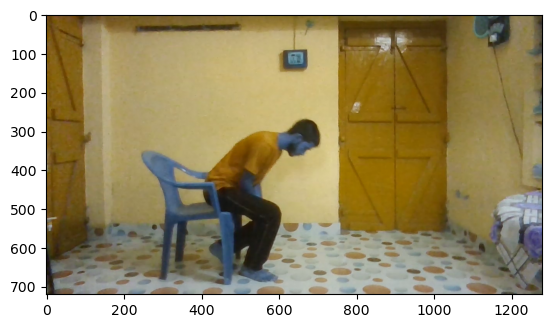

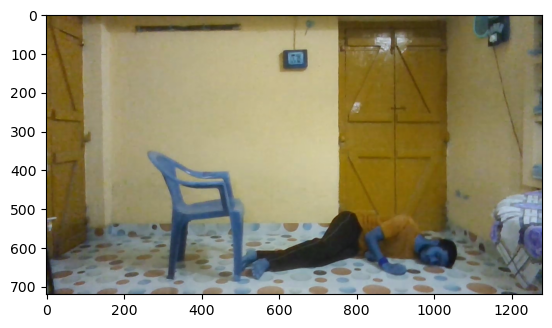

## Sitting

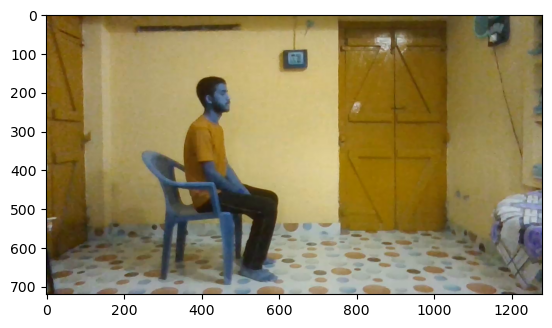

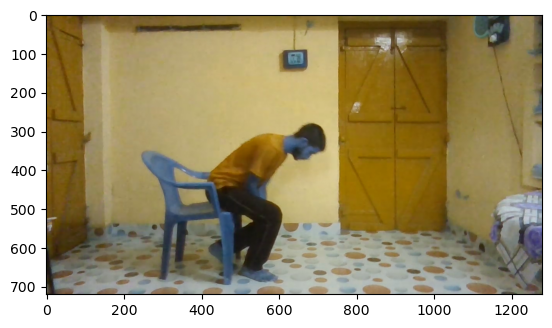

In [32]:
# Get the first subject
df_subject_1 = df[df['subject'] == df['subject'].unique()[0]]

# Get the first falling activity
df_subject_1_activity_1 = df_subject_1[df_subject_1['class'] == 'Fall']

# Get the first record
rec = df_subject_1_activity_1.iloc[0]
classes = parse_classes(rec[' Classes'])

# For each activity in the video, get the first and last frames and display them
for activity_class in classes:
    display(Markdown(f"## {activity_class['class']}"))
    frames = get_frames(rec, activity_class['start'], activity_class['end'])

    plt.imshow(frames[0])
    plt.show()

    plt.imshow(frames[-1])
    plt.show()

### Observations

* In this dataset, the falling seems to start before the frames are classified as `falling`